# Cat and Dog Classifier

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train_dir = r"cats_and_dogs\train"
validation_dir = r"cats_and_dogs\validation"
test_dir = r"cats_and_dogs\test"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory( validation_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import VGG16

In [7]:
conv_base = VGG16(weights='imagenet',
                  include_top = False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [10]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
conv_base.trainable = False

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy',
             optimizer = keras.optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

In [15]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('Model-{epoch:02d}.h5')

In [16]:
model_history = model.fit(train_generator, epochs=30,
                         steps_per_epoch=63,
                         validation_data = validation_generator,
                         validation_steps=32,
                         callbacks=[checkpoint_cb])

Epoch 1/30
63/63 [==============================] - 962s 15s/step - loss: 0.6230 - acc: 0.6620 - val_loss: 0.4873 - val_acc: 0.8240
Epoch 2/30
63/63 [==============================] - 20s 310ms/step - loss: 0.5116 - acc: 0.7605 - val_loss: 0.4113 - val_acc: 0.8410
Epoch 3/30
63/63 [==============================] - 19s 308ms/step - loss: 0.4660 - acc: 0.7955 - val_loss: 0.3612 - val_acc: 0.8600
Epoch 4/30
63/63 [==============================] - 20s 310ms/step - loss: 0.4297 - acc: 0.8115 - val_loss: 0.3338 - val_acc: 0.8720
Epoch 5/30
63/63 [==============================] - 20s 310ms/step - loss: 0.4083 - acc: 0.8270 - val_loss: 0.3085 - val_acc: 0.8820
Epoch 6/30
63/63 [==============================] - 19s 308ms/step - loss: 0.3858 - acc: 0.8315 - val_loss: 0.2999 - val_acc: 0.8740
Epoch 7/30
63/63 [==============================] - 19s 308ms/step - loss: 0.3889 - acc: 0.8250 - val_loss: 0.2879 - val_acc: 0.8880
Epoch 8/30
63/63 [==============================] - 19s 304ms/step - l

In [17]:
model_history.params

{'epochs': 30, 'steps': 63, 'verbose': 1}

In [18]:
model_history.history

{'acc': [0.6620000004768372,
  0.7605000138282776,
  0.7954999804496765,
  0.8115000128746033,
  0.8270000219345093,
  0.8314999938011169,
  0.824999988079071,
  0.8489999771118164,
  0.8395000100135803,
  0.8519999980926514,
  0.8544999957084656,
  0.8569999933242798,
  0.8535000085830688,
  0.8525000214576721,
  0.859499990940094,
  0.8619999885559082,
  0.8665000200271606,
  0.8539999723434448,
  0.8640000224113464,
  0.8604999780654907,
  0.8610000014305115,
  0.8659999966621399,
  0.8675000071525574,
  0.8684999942779541,
  0.8709999918937683,
  0.8715000152587891,
  0.8799999952316284,
  0.8659999966621399,
  0.8765000104904175,
  0.8755000233650208],
 'loss': [0.622991681098938,
  0.5116379261016846,
  0.4660397171974182,
  0.42973068356513977,
  0.4083348214626312,
  0.3858451843261719,
  0.38889238238334656,
  0.3600735366344452,
  0.36212456226348877,
  0.3424054682254791,
  0.34497344493865967,
  0.33611875772476196,
  0.33172252774238586,
  0.3371744155883789,
  0.323251396

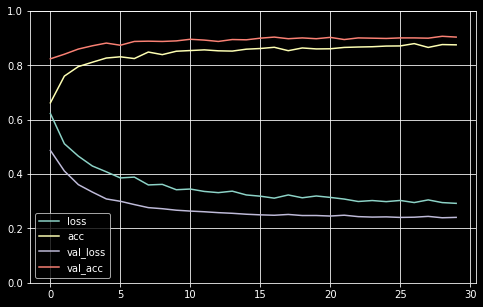

In [19]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
hist_df = pd.DataFrame(model_history.history)

In [21]:
hist_csv_file = 'VGG16 Model History.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [22]:
test_generator = test_datagen.flow_from_directory( test_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [23]:
model.evaluate(test_generator, steps=50)

50/50 [==============================] - 309s 6s/step - loss: 0.2456 - acc: 0.9050


[0.2456471025943756, 0.9049999713897705]